# <font color='green'>BIKE SHARING ASSIGNMENT </font>
 <font color='blue'>--------------------------------------------------------------------------------</font>

### Given Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

---------------------------------------------------

## Step 1: Reading and Understanding the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
#Read the csv file & view first 5 rows
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#check for the no of rows and cols

data.shape

(730, 16)

In [5]:
#check if there is any null rows & check for the data type of cols

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### From above we know that there is no missing values. Hence no need of imputing any values.

#### Instant is an index column. Hence we can remove it (drop)

In [6]:
data.drop(['instant'],axis=1,inplace=True)

In [7]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### We can see that there are some columns with redundant information. 
#### The dteday and yr, month are telling the same story. We will not be needing the day from the date. Hence we can drop this column as well.
#### Similarly, the casual and registered columns are added and stored in cnt(which will be our target variable). Hence we can drop them both.

In [8]:
data.drop(['dteday'],axis=1,inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
data.drop(['casual', 'registered'],axis=1,inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Handling Categorical Variables

In [10]:
#Replacing Weathersit with appropriate values from the data dictionary:

data['weathersit'].replace({1:'Partly_Cloudy', 2:'Mist_Broken_Clouds', 3:'Snow_Light_Rain_Thunderstorm', 4:'Heavy_Rain_Ice_Thunderstorm'},inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,Mist_Broken_Clouds,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,Mist_Broken_Clouds,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,Partly_Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,Partly_Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,Partly_Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# Replacing Season values from the data dictionary:

data['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}, inplace=True)
data.tail()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
725,Spring,1,12,0,5,1,Mist_Broken_Clouds,10.420847,11.33210,65.2917,23.458911,2114
726,Spring,1,12,0,6,0,Mist_Broken_Clouds,10.386653,12.75230,59.0000,10.416557,3095
727,Spring,1,12,0,0,0,Mist_Broken_Clouds,10.386653,12.12000,75.2917,8.333661,1341
728,Spring,1,12,0,1,1,Partly_Cloudy,10.489153,11.58500,48.3333,23.500518,1796
729,Spring,1,12,0,2,1,Mist_Broken_Clouds,8.849153,11.17435,57.7500,10.374682,2729


In [12]:
# Replacing Weekday with appropriate values:

data['weekday'].replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},inplace=True)
data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,Monday,1,Mist_Broken_Clouds,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,Tuesday,1,Mist_Broken_Clouds,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,Wednesday,1,Partly_Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,Thursday,1,Partly_Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,Friday,1,Partly_Cloudy,9.305237,11.46350,43.6957,12.522300,1600
5,Spring,0,1,0,Saturday,0,Partly_Cloudy,8.378268,11.66045,51.8261,6.000868,1606
6,Spring,0,1,0,Sunday,0,Mist_Broken_Clouds,8.057402,10.44195,49.8696,11.304642,1510
7,Spring,0,1,0,Monday,1,Mist_Broken_Clouds,6.765000,8.11270,53.5833,17.875868,959
8,Spring,0,1,0,Tuesday,1,Partly_Cloudy,5.671653,5.80875,43.4167,24.250650,822
9,Spring,0,1,0,Wednesday,1,Partly_Cloudy,6.184153,7.54440,48.2917,14.958889,1321


In [13]:
# To know more about the numeric variables

data.describe()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,3.450215,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,1.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,4.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,7.000000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,10.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,12.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [14]:
# Replacing Month with appropriate values:

data['mnth'].replace({1:'JAN',2:'FEB',3:'MAR',4:'APR',5:'MAY',6:'JUN', 7:'JUL', 8:'AUG', 9:'SEP', 10:'OCT', 11:'NOV', 12:'DEC'},inplace=True)
data.head(10)
# data['mnth'] = data['mnth'].astype('category')
# data['mnth'].replace({1:'1',2:'2',3:'3',4:'4',5:'5',6:'6', 7:'7', 8:'8', 9:'9', 10:'10', 11:'11', 12:'12'},inplace=True)
# data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,JAN,0,Monday,1,Mist_Broken_Clouds,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,JAN,0,Tuesday,1,Mist_Broken_Clouds,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,JAN,0,Wednesday,1,Partly_Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,JAN,0,Thursday,1,Partly_Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,JAN,0,Friday,1,Partly_Cloudy,9.305237,11.46350,43.6957,12.522300,1600
5,Spring,0,JAN,0,Saturday,0,Partly_Cloudy,8.378268,11.66045,51.8261,6.000868,1606
6,Spring,0,JAN,0,Sunday,0,Mist_Broken_Clouds,8.057402,10.44195,49.8696,11.304642,1510
7,Spring,0,JAN,0,Monday,1,Mist_Broken_Clouds,6.765000,8.11270,53.5833,17.875868,959
8,Spring,0,JAN,0,Tuesday,1,Partly_Cloudy,5.671653,5.80875,43.4167,24.250650,822
9,Spring,0,JAN,0,Wednesday,1,Partly_Cloudy,6.184153,7.54440,48.2917,14.958889,1321


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Now as we have got an understanding about the data, lets visualize them for beter information.

## Step 2: Visualising the Data

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

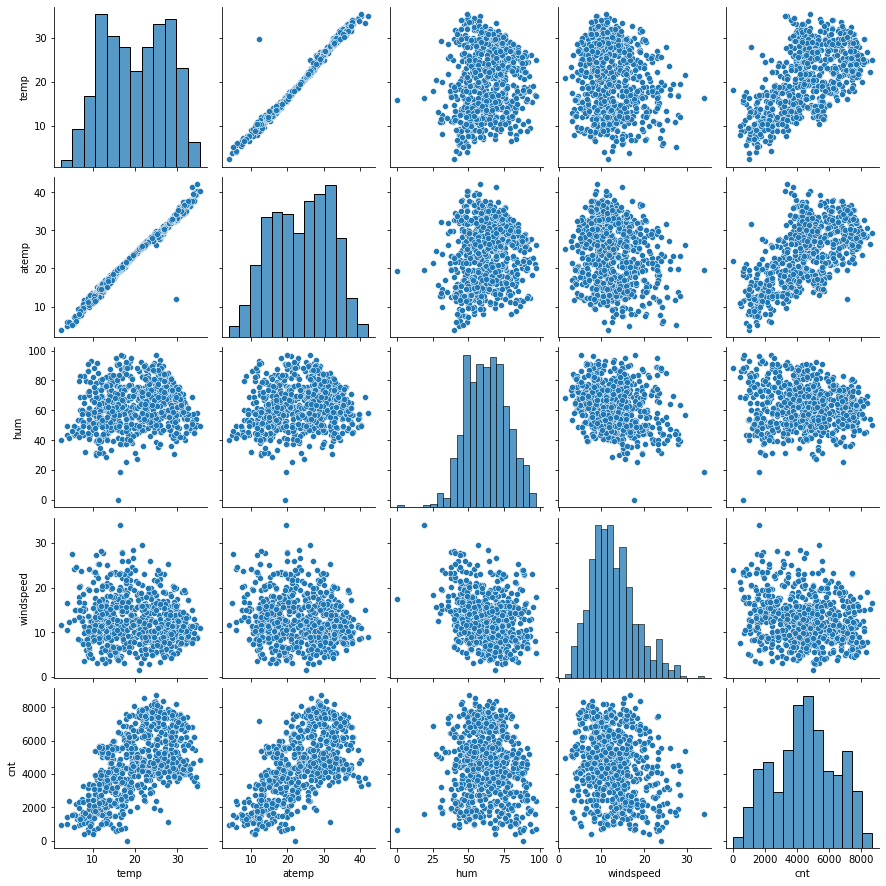

In [18]:
# Creating a pairplot for the numeric variables:
sns.pairplot(data, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

#### From above plot, we can see that the relationship between the variables temp & atemp is very strong. This may affect our model. Hence we can remove one.

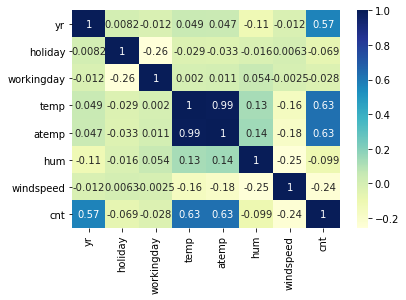

In [19]:
# To check the correlation between the variables:
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [20]:
# We can clearly see that temp and atemp are having very high correlation almost equal to 1. Hence we can remove one.
data.drop(['temp'],axis=1,inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,JAN,0,Monday,1,Mist_Broken_Clouds,18.18125,80.5833,10.749882,985
1,Spring,0,JAN,0,Tuesday,1,Mist_Broken_Clouds,17.68695,69.6087,16.652113,801
2,Spring,0,JAN,0,Wednesday,1,Partly_Cloudy,9.47025,43.7273,16.636703,1349
3,Spring,0,JAN,0,Thursday,1,Partly_Cloudy,10.60610,59.0435,10.739832,1562
4,Spring,0,JAN,0,Friday,1,Partly_Cloudy,11.46350,43.6957,12.522300,1600


#### Visualizing Categorical Variables

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

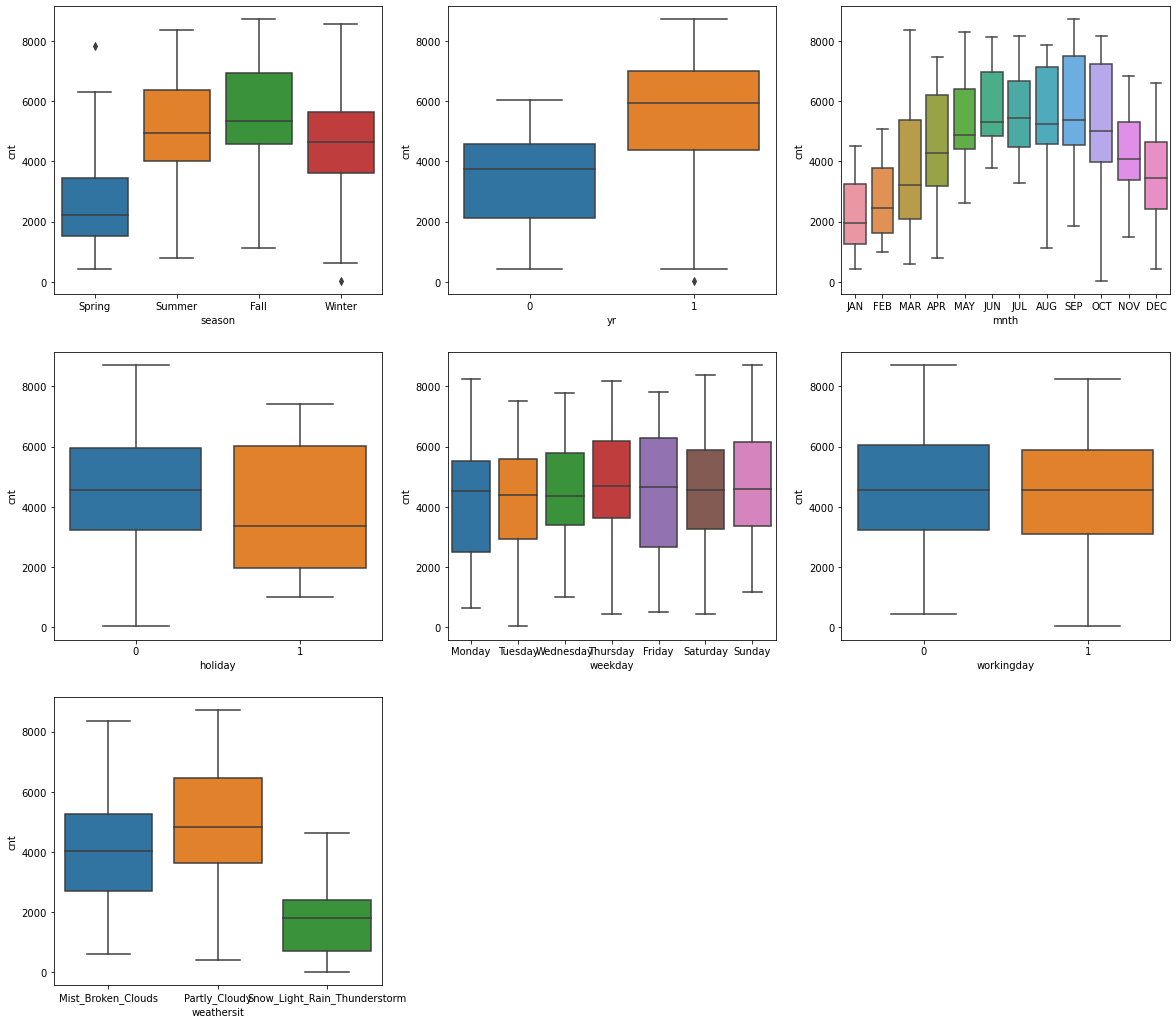

In [21]:
plt.figure(figsize=(20,18))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=data)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=data)
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=data)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=data)
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=data)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=data)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=data)

#### From above plots, we can infer the following:
- There is a high demand for bikes in Partialy_Cloudy days
- During holiday's the demand is little lower.
- In the year 2019 the usage of bikes has increased significantly.
- There is very less usage in the Spring season.

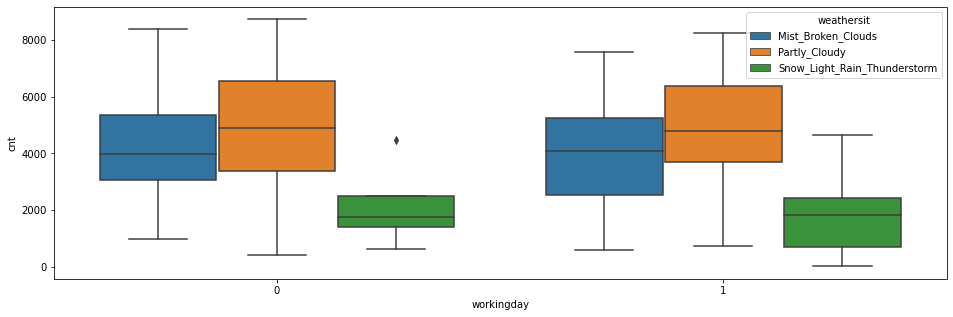

In [22]:
#Comparing Working day and weather type

plt.figure(figsize = (16, 5))
sns.boxplot(x = 'workingday', y = 'cnt', hue = 'weathersit', data = data)
plt.show()

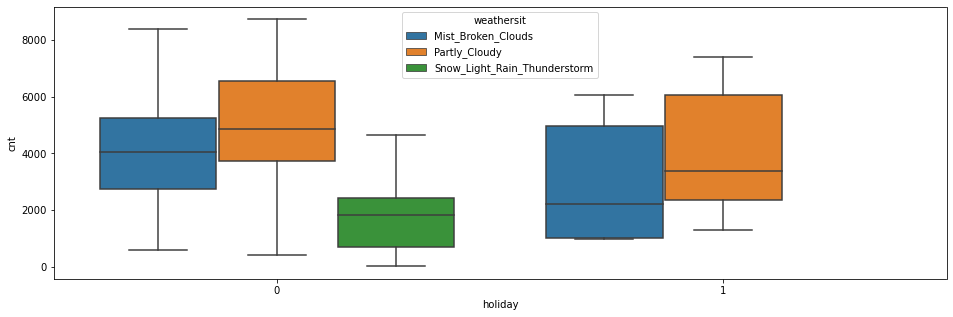

In [23]:
#Comparing Holiday day and weather type

plt.figure(figsize = (16, 5))
sns.boxplot(x = 'holiday', y = 'cnt', hue = 'weathersit', data = data)
plt.show()

- During holidays, there is negligible demand for bikes if the weather is Snow_Light_Rain_Thunderstorm

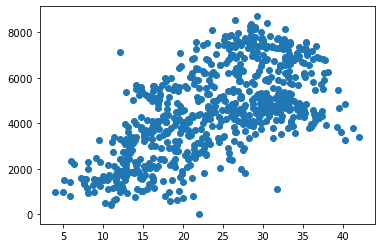

In [24]:
plt.scatter('atemp','cnt',data=data)

#### -We can get some understanding from all the above plots.

## Step 3: Data Preparation

#### Creating Dummy Variables:
#### - We have many categorical variables in our dataset. Hence they need to be converted to numeric values for model building. We can achieve this by creating dummy variables.

In [25]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,JAN,0,Monday,1,Mist_Broken_Clouds,18.18125,80.5833,10.749882,985
1,Spring,0,JAN,0,Tuesday,1,Mist_Broken_Clouds,17.68695,69.6087,16.652113,801
2,Spring,0,JAN,0,Wednesday,1,Partly_Cloudy,9.47025,43.7273,16.636703,1349
3,Spring,0,JAN,0,Thursday,1,Partly_Cloudy,10.60610,59.0435,10.739832,1562
4,Spring,0,JAN,0,Friday,1,Partly_Cloudy,11.46350,43.6957,12.522300,1600


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [27]:
# Taking the object variables and creating dummies:
season_dummy = pd.get_dummies(data['season'], drop_first=True)
yr_dummy = pd.get_dummies(data['yr'], drop_first=True)
mnth_dummy = pd.get_dummies(data['mnth'], drop_first=True)
weekday_dummy = pd.get_dummies(data['weekday'], drop_first=True)
weathersit_dummy = pd.get_dummies(data['weathersit'], drop_first=True)

In [28]:
data = pd.concat([data, season_dummy], axis = 1)
data = pd.concat([data, mnth_dummy], axis = 1)
data = pd.concat([data, weekday_dummy], axis = 1)
data = pd.concat([data, weathersit_dummy], axis = 1)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season                        730 non-null    object 
 1   yr                            730 non-null    int64  
 2   mnth                          730 non-null    object 
 3   holiday                       730 non-null    int64  
 4   weekday                       730 non-null    object 
 5   workingday                    730 non-null    int64  
 6   weathersit                    730 non-null    object 
 7   atemp                         730 non-null    float64
 8   hum                           730 non-null    float64
 9   windspeed                     730 non-null    float64
 10  cnt                           730 non-null    int64  
 11  Spring                        730 non-null    uint8  
 12  Summer                        730 non-null    uint8  
 13  Winte

In [30]:
# We can remove the actual columns
data.drop(['season'], axis = 1,inplace = True)
data.drop(['weathersit'], axis = 1,inplace = True)
data.drop(['weekday'], axis = 1,inplace = True)
data.drop(['mnth'], axis = 1,inplace = True)
data.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,OCT,SEP,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Partly_Cloudy,Snow_Light_Rain_Thunderstorm
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Now our data is ready to build models. Hence we can proceed.

## Step 4: Splitting the Data into Training and Testing Sets

### Test-Train Split:

In [31]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features:

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
#Applying the scaler to variables which have values other than 0 & 1 (except dummy variables and others with 0s and 1s):
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

data_train[num_vars] = scaler.fit_transform(data_train[num_vars])

In [35]:
data_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,OCT,SEP,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Partly_Cloudy,Snow_Light_Rain_Thunderstorm
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.627451,0.029412
std,0.500429,0.157763,0.453386,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.483958,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


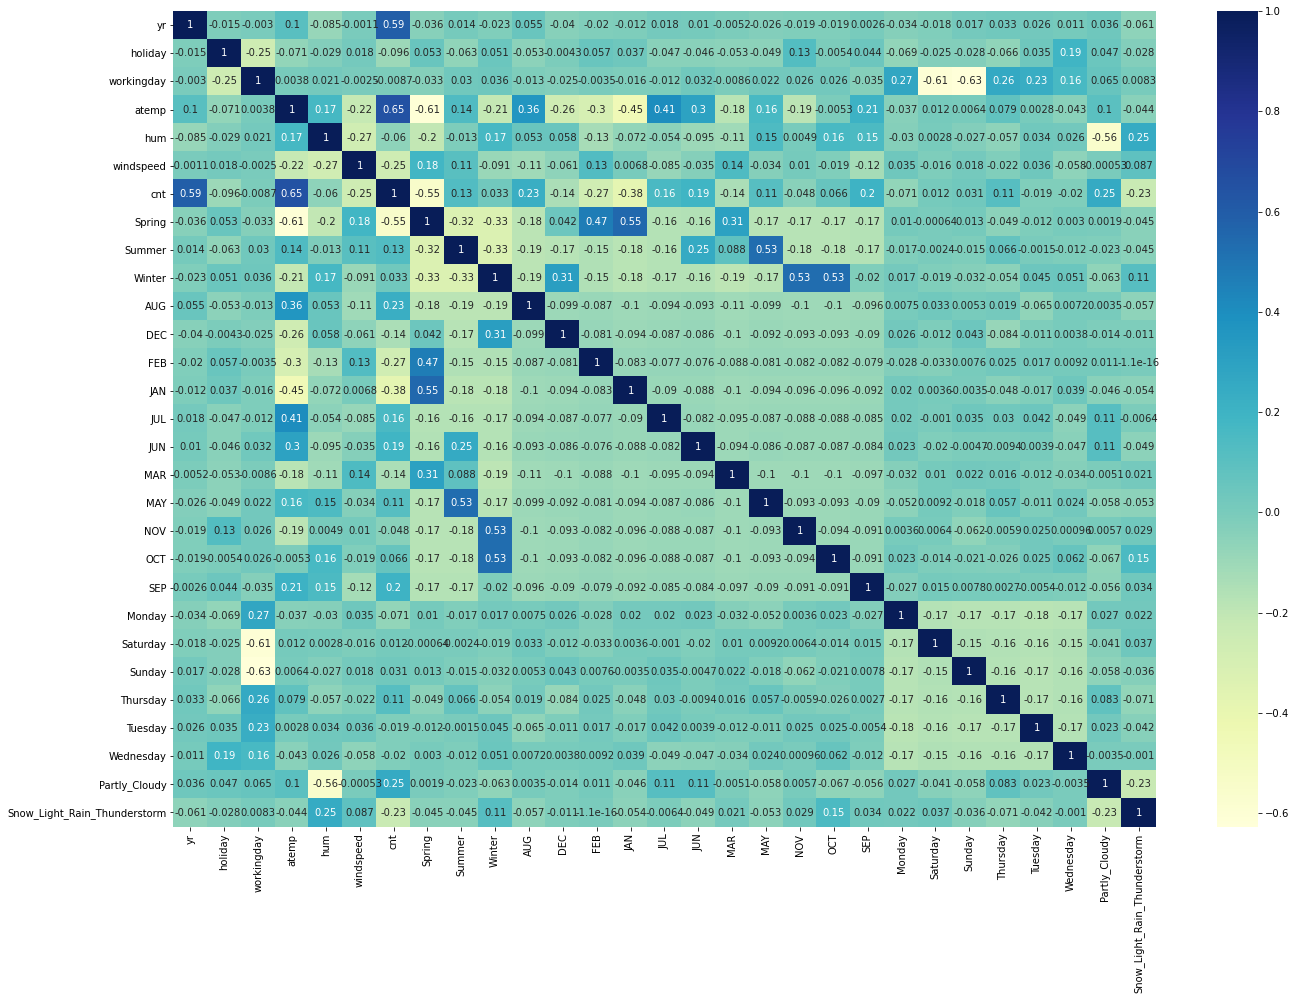

In [36]:
# Checking the correlation coeffitient to find variables that are highly correlated:

plt.figure(figsize = (22, 15))
sns.heatmap(data_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### -- We see that atemp is highly correlated with cnt

#### We could see that we have a large number of features in our set. Hence we have to employ the automated method combined with manual approach to build the model. 


In [37]:
# Creating X & y trains:

y_train = data_train.pop('cnt')
X_train = data_train


## Step 5: Building a linear model

### Using RFE method for feature selection(since the no of feature variables are more than 20). 
### We can start with 10 variables applied RFE and then use manual approach on top of it to fine tune the model.

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [40]:
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', False, 10),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('AUG', True, 1),
 ('DEC', False, 5),
 ('FEB', False, 4),
 ('JAN', False, 3),
 ('JUL', False, 15),
 ('JUN', False, 12),
 ('MAR', False, 19),
 ('MAY', False, 11),
 ('NOV', False, 6),
 ('OCT', False, 17),
 ('SEP', True, 1),
 ('Monday', False, 14),
 ('Saturday', False, 8),
 ('Sunday', False, 9),
 ('Thursday', False, 18),
 ('Tuesday', False, 13),
 ('Wednesday', False, 16),
 ('Partly_Cloudy', False, 2),
 ('Snow_Light_Rain_Thunderstorm', True, 1)]

In [42]:
col = X_train.columns[rfe.support_]

In [43]:
# These are the not supported columns by RFE initially:
X_train.columns[~rfe.support_]

Index(['workingday', 'Spring', 'DEC', 'FEB', 'JAN', 'JUL', 'JUN', 'MAR', 'MAY',
       'NOV', 'OCT', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Partly_Cloudy'],
      dtype='object')

In [44]:
X_train_rfe = X_train[col]

In [45]:
# Building the model using statsmodel.api:

import statsmodels.api as sm

X_train_rfe1 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.9
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.98e-183
Time:                        21:21:19   Log-Likelihood:                 487.06
No. Observations:                 510   AIC:                            -952.1
Df Residuals:                     499   BIC:                            -905.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [46]:
# Function to calculate the VIF value:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF_Calc():
    vif = pd.DataFrame()
    X = X_train_rfe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

VIF_Calc()

,Features,VIF
3,hum,10.26
2,atemp,8.55
4,windspeed,3.55
0,yr,2.01
5,Summer,1.82
6,Winter,1.73
7,AUG,1.54
8,SEP,1.30
9,Snow_Light_Rain_Thunderstorm,1.09
1,holiday,1.04


In [47]:
# Dropping column hum with very high VIF:

X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [48]:
# Building the model and checking VIF value:

X_train_rfe1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe1).fit()
print(lm1.summary())
VIF_Calc()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 09 May 2021   Prob (F-statistic):          4.65e-168
Time:                        21:21:19   Log-Likelihood:                 447.96
No. Observations:                 510   AIC:                            -875.9
Df Residuals:                     500   BIC:                            -833.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
2,atemp,4.89
3,windspeed,2.95
0,yr,2.00
4,Summer,1.80
6,AUG,1.54
5,Winter,1.47
7,SEP,1.29
8,Snow_Light_Rain_Thunderstorm,1.06
1,holiday,1.04


### In the above model, all the variables are significant and have VIF values less than 5. Hence this is a good model. 

### But let us also try adding few feature variables based on the ranking and check if the model improves.

In [49]:
# Adding variables to our current model to check if it improves or not:

X_train_rfe['Partly_Cloudy'] = X_train['Partly_Cloudy']
X_train_rfe.head()

,yr,holiday,atemp,windspeed,Summer,Winter,AUG,SEP,Snow_Light_Rain_Thunderstorm,Partly_Cloudy
653,1,0,0.501133,0.300794,0,1,0,0,0,1
576,1,0,0.766351,0.264686,0,0,0,0,0,1
426,1,0,0.438975,0.255342,0,0,0,0,0,0
728,1,0,0.200348,0.663106,0,0,0,0,0,1
482,1,0,0.391735,0.188475,1,0,0,0,0,0


In [50]:
# Building the model and checking VIF value:

X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())
VIF_Calc()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.0
Date:                Sun, 09 May 2021   Prob (F-statistic):          3.10e-184
Time:                        21:21:19   Log-Likelihood:                 488.96
No. Observations:                 510   AIC:                            -955.9
Df Residuals:                     499   BIC:                            -909.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
2,atemp,5.88
3,windspeed,3.15
9,Partly_Cloudy,2.73
0,yr,2.00
4,Summer,1.81
6,AUG,1.55
5,Winter,1.47
7,SEP,1.30
8,Snow_Light_Rain_Thunderstorm,1.11
1,holiday,1.04


In [51]:
# The VIF value of atemp is above 5. Hence we will drop it.

X_train_rfe = X_train_rfe.drop(['atemp'], axis=1)

In [52]:
# Building the model and checking VIF value:

X_train_rfe2a = sm.add_constant(X_train_rfe)
lm2a = sm.OLS(y_train,X_train_rfe2a).fit()
print(lm2a.summary())
VIF_Calc()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sun, 09 May 2021   Prob (F-statistic):          5.01e-108
Time:                        21:21:19   Log-Likelihood:                 306.23
No. Observations:                 510   AIC:                            -592.5
Df Residuals:                     500   BIC:                            -550.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
2,windspeed,2.85
8,Partly_Cloudy,2.27
0,yr,1.87
3,Summer,1.50
4,Winter,1.39
5,AUG,1.16
7,Snow_Light_Rain_Thunderstorm,1.11
6,SEP,1.09
1,holiday,1.04


#### <font color=brown>While removing 'atemp' we could see drastic drop in R-squared value. This is not a good sign. Hence we will not consider adding the variable 'Partly_Cloudy' and revert back the addition of the variable. Also we will add 'atemp' back to our model.</font>

In [53]:
# Dropping Partly_Cloudy:

X_train_rfe = X_train_rfe.drop(['Partly_Cloudy'], axis=1)

In [54]:
# Re-adding atemp after removing Partialy_Cloudy as this significantly reduced the R-squared value:

X_train_rfe['atemp'] = X_train['atemp']
X_train_rfe.head()

,yr,holiday,windspeed,Summer,Winter,AUG,SEP,Snow_Light_Rain_Thunderstorm,atemp
653,1,0,0.300794,0,1,0,0,0,0.501133
576,1,0,0.264686,0,0,0,0,0,0.766351
426,1,0,0.255342,0,0,0,0,0,0.438975
728,1,0,0.663106,0,0,0,0,0,0.200348
482,1,0,0.188475,1,0,0,0,0,0.391735


In [55]:
# Building the model and checking VIF value:

X_train_rfe2a1 = sm.add_constant(X_train_rfe)
lm2a1 = sm.OLS(y_train,X_train_rfe2a1).fit()
print(lm2a1.summary())
VIF_Calc()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 09 May 2021   Prob (F-statistic):          4.65e-168
Time:                        21:21:19   Log-Likelihood:                 447.96
No. Observations:                 510   AIC:                            -875.9
Df Residuals:                     500   BIC:                            -833.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
8,atemp,4.89
2,windspeed,2.95
0,yr,2.00
3,Summer,1.80
5,AUG,1.54
4,Winter,1.47
6,SEP,1.29
7,Snow_Light_Rain_Thunderstorm,1.06
1,holiday,1.04


In [56]:
# Adding workingday:

X_train_rfe['workingday'] = X_train['workingday']
X_train_rfe.head()


,yr,holiday,windspeed,Summer,Winter,AUG,SEP,Snow_Light_Rain_Thunderstorm,atemp,workingday
653,1,0,0.300794,0,1,0,0,0,0.501133,1
576,1,0,0.264686,0,0,0,0,0,0.766351,1
426,1,0,0.255342,0,0,0,0,0,0.438975,0
728,1,0,0.663106,0,0,0,0,0,0.200348,1
482,1,0,0.188475,1,0,0,0,0,0.391735,0


In [57]:
# Building the model and checking VIF value:

X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())
VIF_Calc()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     200.0
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.96e-167
Time:                        21:21:19   Log-Likelihood:                 449.28
No. Observations:                 510   AIC:                            -876.6
Df Residuals:                     499   BIC:                            -830.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
8,atemp,5.59
2,windspeed,3.25
9,workingday,3.19
0,yr,2.01
3,Summer,1.80
5,AUG,1.54
4,Winter,1.52
6,SEP,1.29
1,holiday,1.08
7,Snow_Light_Rain_Thunderstorm,1.06


In [58]:
# workingday has high p-value. Hence Lets drop it.

X_train_rfe = X_train_rfe.drop(['workingday'], axis = 1)

In [59]:
# Building the model and checking VIF value:

X_train_rfe3a = sm.add_constant(X_train_rfe)
lm3a = sm.OLS(y_train,X_train_rfe3a).fit()
print(lm3a.summary())
VIF_Calc()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 09 May 2021   Prob (F-statistic):          4.65e-168
Time:                        21:21:19   Log-Likelihood:                 447.96
No. Observations:                 510   AIC:                            -875.9
Df Residuals:                     500   BIC:                            -833.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
8,atemp,4.89
2,windspeed,2.95
0,yr,2.00
3,Summer,1.80
5,AUG,1.54
4,Winter,1.47
6,SEP,1.29
7,Snow_Light_Rain_Thunderstorm,1.06
1,holiday,1.04


In [60]:
# Adding JAN and checking for model behaviour:

X_train_rfe['JAN'] = X_train['JAN']
X_train_rfe.head()

,yr,holiday,windspeed,Summer,Winter,AUG,SEP,Snow_Light_Rain_Thunderstorm,atemp,JAN
653,1,0,0.300794,0,1,0,0,0,0.501133,0
576,1,0,0.264686,0,0,0,0,0,0.766351,0
426,1,0,0.255342,0,0,0,0,0,0.438975,0
728,1,0,0.663106,0,0,0,0,0,0.200348,0
482,1,0,0.188475,1,0,0,0,0,0.391735,0


In [61]:
# Building the model and checking VIF value:

X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())
VIF_Calc()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     202.6
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.46e-168
Time:                        21:21:19   Log-Likelihood:                 451.94
No. Observations:                 510   AIC:                            -881.9
Df Residuals:                     499   BIC:                            -835.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
8,atemp,4.91
2,windspeed,3.23
0,yr,2.03
3,Summer,1.86
5,AUG,1.55
4,Winter,1.51
6,SEP,1.29
9,JAN,1.18
7,Snow_Light_Rain_Thunderstorm,1.06
1,holiday,1.04


In [62]:
# Dropping JAN as there is no significant difference in R-squared value of our model:

X_train_rfe=X_train_rfe.drop(['JAN'],axis=1)

In [63]:
# Building the model and checking VIF value:

X_train_rfe4a = sm.add_constant(X_train_rfe)
lm4a = sm.OLS(y_train,X_train_rfe4a).fit()
print(lm4a.summary())
VIF_Calc()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 09 May 2021   Prob (F-statistic):          4.65e-168
Time:                        21:21:20   Log-Likelihood:                 447.96
No. Observations:                 510   AIC:                            -875.9
Df Residuals:                     500   BIC:                            -833.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
8,atemp,4.89
2,windspeed,2.95
0,yr,2.00
3,Summer,1.80
5,AUG,1.54
4,Winter,1.47
6,SEP,1.29
7,Snow_Light_Rain_Thunderstorm,1.06
1,holiday,1.04


In [64]:
# Adding FEB and checking for model behaviour:

X_train_rfe['FEB'] = X_train['FEB']
X_train_rfe.head()

,yr,holiday,windspeed,Summer,Winter,AUG,SEP,Snow_Light_Rain_Thunderstorm,atemp,FEB
653,1,0,0.300794,0,1,0,0,0,0.501133,0
576,1,0,0.264686,0,0,0,0,0,0.766351,0
426,1,0,0.255342,0,0,0,0,0,0.438975,0
728,1,0,0.663106,0,0,0,0,0,0.200348,0
482,1,0,0.188475,1,0,0,0,0,0.391735,0


In [65]:
# Building the model and checking VIF value:

X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())
VIF_Calc()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     198.7
Date:                Sun, 09 May 2021   Prob (F-statistic):          6.92e-167
Time:                        21:21:20   Log-Likelihood:                 447.99
No. Observations:                 510   AIC:                            -874.0
Df Residuals:                     499   BIC:                            -827.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
8,atemp,4.90
2,windspeed,3.28
0,yr,2.01
3,Summer,1.88
5,AUG,1.55
4,Winter,1.52
6,SEP,1.30
9,FEB,1.20
7,Snow_Light_Rain_Thunderstorm,1.06
1,holiday,1.04


In [66]:
# Dropping FEB as there is no significant difference in the model.

X_train_rfe=X_train_rfe.drop(['FEB'],axis=1)

In [67]:
# Building the model and checking VIF value:

X_train_rfe5a = sm.add_constant(X_train_rfe)
lm5a = sm.OLS(y_train,X_train_rfe5a).fit()
print(lm5a.summary())
VIF_Calc()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 09 May 2021   Prob (F-statistic):          4.65e-168
Time:                        21:21:20   Log-Likelihood:                 447.96
No. Observations:                 510   AIC:                            -875.9
Df Residuals:                     500   BIC:                            -833.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
8,atemp,4.89
2,windspeed,2.95
0,yr,2.00
3,Summer,1.80
5,AUG,1.54
4,Winter,1.47
6,SEP,1.29
7,Snow_Light_Rain_Thunderstorm,1.06
1,holiday,1.04


In [68]:
# Adding variable Spring and checking model behaviour:

X_train_rfe['Spring'] = X_train['Spring']
X_train_rfe.head()

,yr,holiday,windspeed,Summer,Winter,AUG,SEP,Snow_Light_Rain_Thunderstorm,atemp,Spring
653,1,0,0.300794,0,1,0,0,0,0.501133,0
576,1,0,0.264686,0,0,0,0,0,0.766351,0
426,1,0,0.255342,0,0,0,0,0,0.438975,1
728,1,0,0.663106,0,0,0,0,0,0.200348,1
482,1,0,0.188475,1,0,0,0,0,0.391735,0


In [69]:
# Building the model and checking VIF value:

X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())
VIF_Calc()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     201.9
Date:                Sun, 09 May 2021   Prob (F-statistic):          2.77e-168
Time:                        21:21:20   Log-Likelihood:                 451.29
No. Observations:                 510   AIC:                            -880.6
Df Residuals:                     499   BIC:                            -834.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
8,atemp,4.89
2,windspeed,4.51
3,Summer,2.28
0,yr,2.07
9,Spring,2.04
4,Winter,1.79
5,AUG,1.66
6,SEP,1.34
7,Snow_Light_Rain_Thunderstorm,1.06
1,holiday,1.04


In [70]:
# No significant difference in the R-squared value of our model. Hence we will remove it.

X_train_rfe = X_train_rfe.drop(['Spring'], axis = 1)

In [71]:
# Building the model and checking VIF value:

X_train_rfe6a = sm.add_constant(X_train_rfe)
lm6a = sm.OLS(y_train,X_train_rfe6a).fit()
print(lm6a.summary())
VIF_Calc()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 09 May 2021   Prob (F-statistic):          4.65e-168
Time:                        21:21:20   Log-Likelihood:                 447.96
No. Observations:                 510   AIC:                            -875.9
Df Residuals:                     500   BIC:                            -833.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Features,VIF
8,atemp,4.89
2,windspeed,2.95
0,yr,2.00
3,Summer,1.80
5,AUG,1.54
4,Winter,1.47
6,SEP,1.29
7,Snow_Light_Rain_Thunderstorm,1.06
1,holiday,1.04


### The above model is same as the model lm1. Hence we will use the model lm1 and proceed.

### Looks like the above model which we have is a good one. Adding variables are not doing any good to the model. 

## Step 7: Residual Analysis of the train data

In [72]:
#Predicting values:
y_train_cnt = lm1.predict(X_train_rfe1)

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# Calculating the residual value:
res=y_train - y_train_cnt

Text(0, 0.5, 'Density')

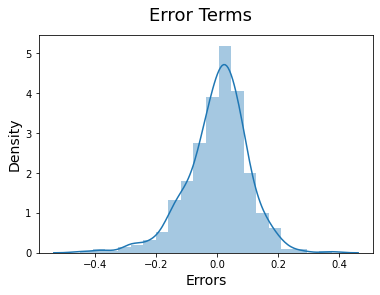

In [75]:
# Plotting the the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 18)
plt.xlabel('Errors', fontsize = 14)
plt.ylabel('Density', fontsize = 14)

#### Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions on the test set using the chosen model.

## Step 8: Making Predictions Using the Choosen Model

In [76]:
#Scaling the test data
num_vars=['atemp','hum','windspeed','cnt']
data_test[num_vars] = scaler.fit_transform(data_test[num_vars])

In [77]:
#Creating x and y sets
y_test = data_test.pop('cnt')
X_test = data_test

In [78]:
X_train_final = X_train_rfe1.drop(['const'], axis=1)

In [79]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_train_final = X_test[X_train_final.columns]

# Adding a constant variable 
X_train_final = sm.add_constant(X_train_final)

In [80]:
#Making predictions on the chosen model

y_pred = lm1.predict(X_train_final)

## Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

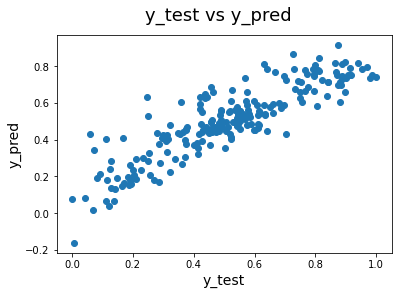

In [81]:
# Plotting y_test and y_pred to understand the spread:

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=18)              
plt.xlabel('y_test', fontsize=14)                          
plt.ylabel('y_pred', fontsize=14)    

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#The mean square error is the average of the square of the difference between the observed and predicted values of a variable.

#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.11482991912375294

In [83]:
#Calculate the r square for test set

r_squared = r2_score(y_test, y_pred)
r_squared

0.7675194768654874

In [84]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 09 May 2021   Prob (F-statistic):          4.65e-168
Time:                        21:21:20   Log-Likelihood:                 447.96
No. Observations:                 510   AIC:                            -875.9
Df Residuals:                     500   BIC:                            -833.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### The R-squared of our train model is <font color='brown'>79.9%</font>
#### R-squared value in the test data using the same model is  <font color='brown'>76.8%</font>
#### Hence we can conclude that our model is performing better and can be suggested to the management.

### <font color=brown>We can see that the equation of our best fitted line is:</font>

#### <font color='black'>cnt = 0.0858 + 0.2344 x yr -0.0817 x holiday + 0.5680 x atemp -0.1237 x windspeed + 0.0870 x Summer + 0.1266 x Winter + 0.0535 x AUG + 0.1044 x SEP -0.2460 x Snow_Light_Rain_Thunderstorm </font>

### <font color=brown>Final recommendations for the management:</font>
##### - Demand is higher in the month of  <font color=green>August & September.</font>
##### - Demand increases if the <font color=green>temperature</font> is higher.
##### - Demand decreases in the <font color=red>'Snow_Light_Rain_Thunderstorm'</font>  weather.
##### - Demand decreases if the <font color=red>windspeed</font> is higher.
##### - Demand decreases if it is a <font color=red>holiday.</font>